In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df = pd.read_csv("/content/loan_default.csv")
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,YEARS_EMPLOYED
0,0.0,Cash loans,M,Y,N,1,225000.0,578619.0,23229.0,-12347,0
1,0.0,Revolving loans,M,Y,Y,1,NaN,270000.0,13500.0,-14048,6
2,0.0,Cash loans,M,Y,N,0,144000.0,753840.0,29340.0,-14639,6
3,0.0,Cash loans,F,N,Y,0,81000.0,98910.0,7785.0,-14591,11
4,0.0,Cash loans,F,N,Y,1,103500.0,521280.0,26779.5,-12023,0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10284 entries, 0 to 10283
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TARGET              10281 non-null  float64
 1   NAME_CONTRACT_TYPE  10284 non-null  object 
 2   CODE_GENDER         10284 non-null  object 
 3   FLAG_OWN_CAR        8022 non-null   object 
 4   FLAG_OWN_REALTY     10254 non-null  object 
 5   CNT_CHILDREN        10284 non-null  int64  
 6   AMT_INCOME_TOTAL    6993 non-null   float64
 7   AMT_CREDIT          10284 non-null  float64
 8   AMT_ANNUITY         10284 non-null  float64
 9   DAYS_BIRTH          10284 non-null  int64  
 10  YEARS_EMPLOYED      10284 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 883.9+ KB


In [118]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,YEARS_EMPLOYED
count,10281.000000,10284.000000,6.993000e+03,1.028400e+04,10284.000000,10284.000000,10284.000000
mean,0.079078,10.287340,1.679099e+05,5.999026e+05,27191.230747,-16055.232400,-176.848016
std,0.269873,986.138233,1.052457e+05,4.008438e+05,14933.326225,4377.738214,388.125395
min,0.000000,0.000000,2.700000e+04,4.500000e+04,2974.500000,-25166.000000,-1000.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16509.375000,-19724.250000,0.000000
50%,0.000000,0.000000,1.440000e+05,5.124465e+05,25128.000000,-15733.500000,3.000000
75%,0.000000,1.000000,2.025000e+05,8.100000e+05,34596.000000,-12352.000000,7.000000
max,1.000000,99999.000000,3.825000e+06,4.050000e+06,258025.500000,-7680.000000,150.000000


**DATA CLEANING**

From the columns description above, it is apparent that some columns have high standard deviations and high max values beyond the 75%, hence the possible presence of outliers

In [119]:
# Handling Outliers
df['CNT_CHILDREN'].value_counts()
outlier = df['CNT_CHILDREN'].quantile(0.99)
print(f"outlier: {outlier}")

df = df[df['CNT_CHILDREN'] <= outlier]

print("DataFrame after removing outlier:")
df['CNT_CHILDREN'].describe()

outlier: 3.0
DataFrame after removing outlier:


,CNT_CHILDREN
count,10263.000000
mean,0.402709
std,0.694144
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


In [120]:
# Handling Outliers
median_value = df['YEARS_EMPLOYED'].median()
print(median_value)
df['YEARS_EMPLOYED'] = df['YEARS_EMPLOYED'].replace([-1000, -177.2222547, 150], median_value)

3.0


<ipython-input-120-72cf4d94a91d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YEARS_EMPLOYED'] = df['YEARS_EMPLOYED'].replace([-1000, -177.2222547, 150], median_value)


In [121]:
categorical_column = df.select_dtypes("object")
categorical_column.value_counts()

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY
Cash loans          F            N             Y                  2601
                                               N                  1177
                    M            Y             Y                   890
                                 N             Y                   717
                    F            Y             Y                   703
                    M            Y             N                   471
                                 N             N                   364
                    F            Y             N                   324
Revolving loans     F            N             Y                   307
                    M            Y             Y                   110
                                 N             Y                    92
                    F            Y             Y                    85
                                 N             N                    82
                    M            Y             N                    25
                                 N             N                    16
                    F            Y             N                    15
Cash loans          M            Y             YES                   2
                    F            N             NO                    2
                    M            Y             NO                    1
                    F            N             YES                   1
Name: count, dtype: int64

FLAG_OWN_REALTY has some inconsistencies in its column

In [122]:
# Handling inconsistencies in categorical columns
df.loc[:, 'FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].replace({'YES': 'Y', 'NO': 'N'})
df['FLAG_OWN_REALTY'].nunique()

2

In [123]:
# Handling null values
df.isnull().sum()

,0
TARGET,3
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,2257
FLAG_OWN_REALTY,29
CNT_CHILDREN,0
AMT_INCOME_TOTAL,3285
AMT_CREDIT,0
AMT_ANNUITY,0
DAYS_BIRTH,0


In [124]:
# Replace flag_own_car null values with the same proportion of N and Y as it was before
counts = df['FLAG_OWN_CAR'].value_counts()

total = df['FLAG_OWN_CAR'].notna().sum()  # Total non-null values

proportion_N = counts.iloc[0] / total
proportion_Y = counts.iloc[1] / total

num_nan = df['FLAG_OWN_CAR'].isna().sum()

# Generate random 'N' or 'Y' values based on  proportions
random_fill = np.random.choice(['N', 'Y'], size=num_nan, p=[proportion_N, proportion_Y])
df.loc[df['FLAG_OWN_CAR'].isna(), 'FLAG_OWN_CAR'] = random_fill

In [125]:
# Drop Target and flag_own_reality volumns
mask = df[['TARGET', 'FLAG_OWN_REALTY']].notna().all(axis=1)

# Replace only the rows where NaNs were dropped
df = df[mask]


In [126]:
mean_value = df['AMT_INCOME_TOTAL'].mean()
df['AMT_INCOME_TOTAL'].fillna(mean_value, inplace=True)

<ipython-input-126-4463ac450cde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AMT_INCOME_TOTAL'].fillna(mean_value, inplace=True)


In [127]:
df.isnull().sum()

,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0
DAYS_BIRTH,0


In [128]:
df['DAYS_BIRTH'] = (df['DAYS_BIRTH']//365).abs()
df['DAYS_BIRTH'].head()

<ipython-input-128-80a1ac83f774>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DAYS_BIRTH'] = (df['DAYS_BIRTH']//365).abs()


,DAYS_BIRTH
0,34
1,39
2,41
3,40
4,33


In [129]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10231 entries, 0 to 10283
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TARGET              10231 non-null  float64
 1   NAME_CONTRACT_TYPE  10231 non-null  object 
 2   CODE_GENDER         10231 non-null  object 
 3   FLAG_OWN_CAR        10231 non-null  object 
 4   FLAG_OWN_REALTY     10231 non-null  object 
 5   CNT_CHILDREN        10231 non-null  int64  
 6   AMT_INCOME_TOTAL    10231 non-null  float64
 7   AMT_CREDIT          10231 non-null  float64
 8   AMT_ANNUITY         10231 non-null  float64
 9   DAYS_BIRTH          10231 non-null  int64  
 10  YEARS_EMPLOYED      10231 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 959.2+ KB


In [130]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,YEARS_EMPLOYED
count,10231.000000,10231.000000,1.023100e+04,1.023100e+04,10231.000000,10231.000000,10231.000000
mean,0.078682,0.402502,1.678989e+05,6.002573e+05,27195.623546,44.493989,5.509823
std,0.269256,0.693955,8.679783e+04,4.010417e+05,14930.480039,11.999794,5.911574
min,0.000000,0.000000,2.700000e+04,4.500000e+04,2974.500000,22.000000,0.000000
25%,0.000000,0.000000,1.271250e+05,2.700000e+05,16515.000000,34.000000,2.000000
50%,0.000000,0.000000,1.678989e+05,5.124465e+05,25128.000000,44.000000,3.000000
75%,0.000000,1.000000,1.800000e+05,8.100000e+05,34596.000000,55.000000,7.000000
max,1.000000,3.000000,3.825000e+06,4.050000e+06,258025.500000,69.000000,44.000000


In [131]:
categorical_column = df.select_dtypes("object")
categorical_column.value_counts()

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY
Cash loans          F            N             Y                  3206
                                               N                  1450
                    M            N             Y                  1046
                                 Y             Y                  1018
                    F            Y             Y                  1004
                    M            Y             N                   545
                                 N             N                   544
                    F            Y             N                   475
Revolving loans     F            N             Y                   379
                    M            N             Y                   128
                                 Y             Y                   127
                    F            Y             Y                   119
                                 N             N                   110
                    M            Y             N                    31
                    F            Y             N                    25
                    M            N             N                    24
Name: count, dtype: int64

**DATA  VISUALIZATION**

In [132]:
class_counts = df['TARGET'].value_counts()
total_count = len(df)
percentage = (class_counts / total_count) * 100

print(percentage)

TARGET
0.0    92.131756
1.0     7.868244
Name: count, dtype: float64


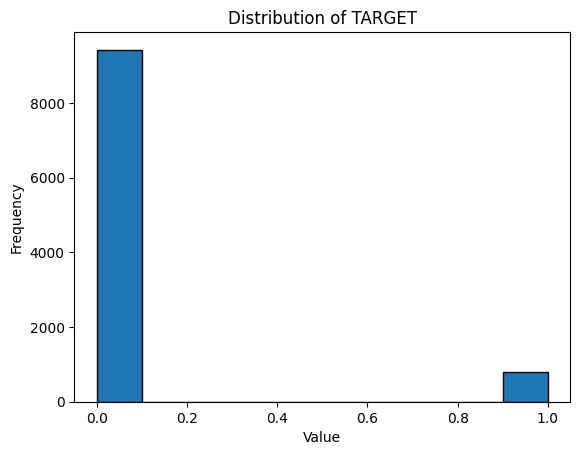

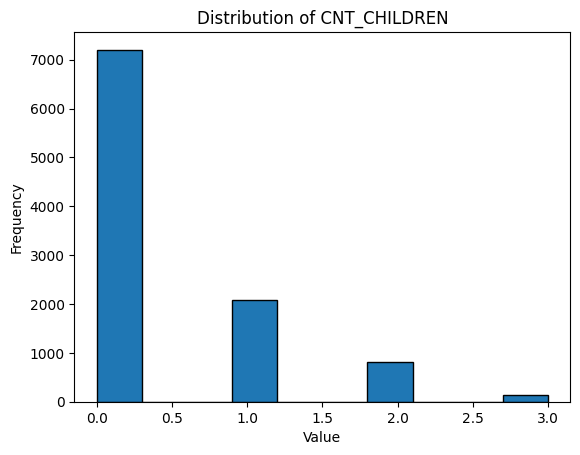

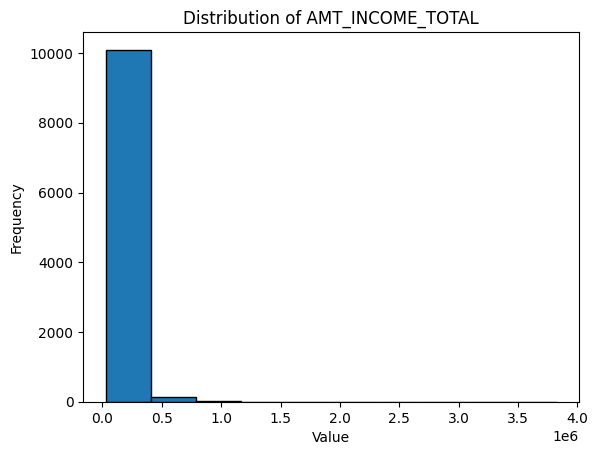

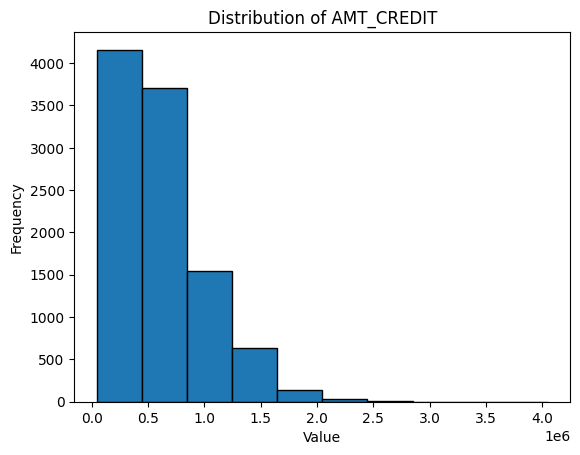

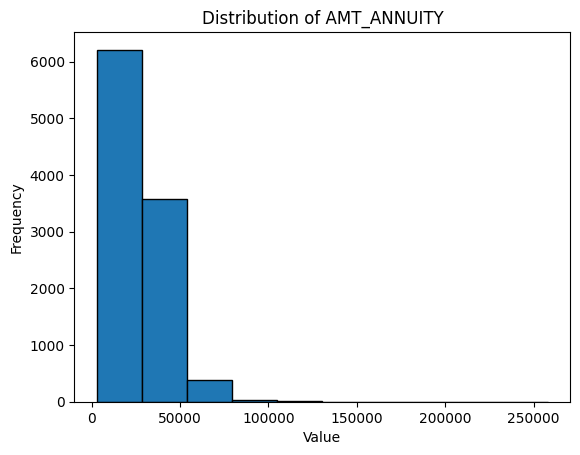

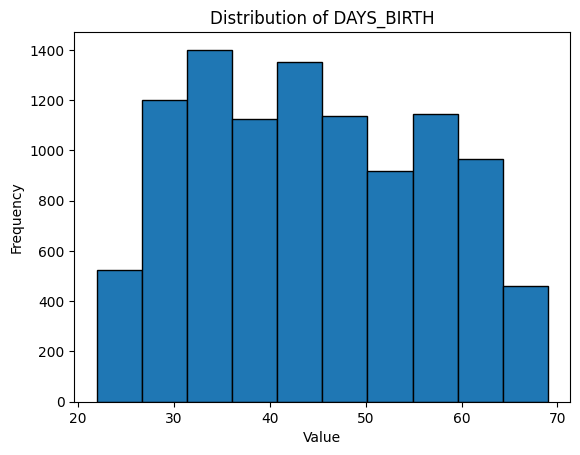

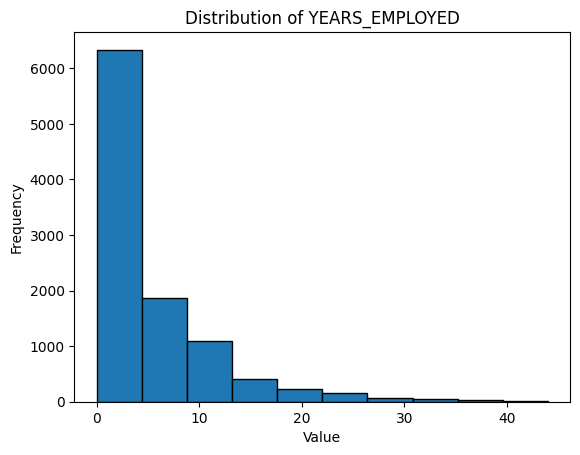

In [133]:
def hist(data, title):
  figsize = (10,5)
  plt.hist(data, bins=10, edgecolor='black')
  plt.title(title)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()

data = df.select_dtypes(include='number').columns

for col in data:
  hist(data=df[col], title= f'Distribution of {col}')


Most of the data are postively skewed

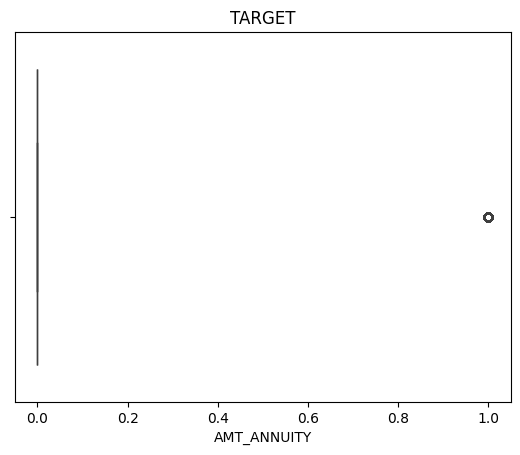

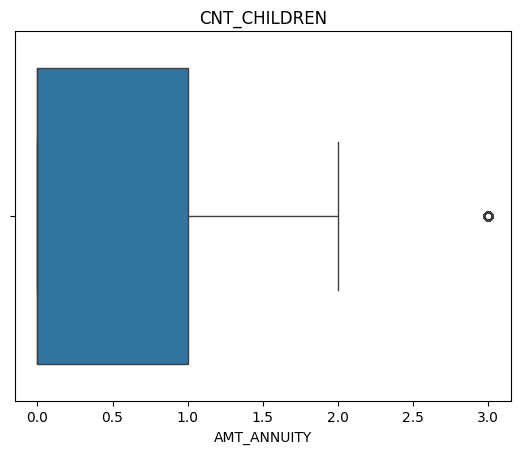

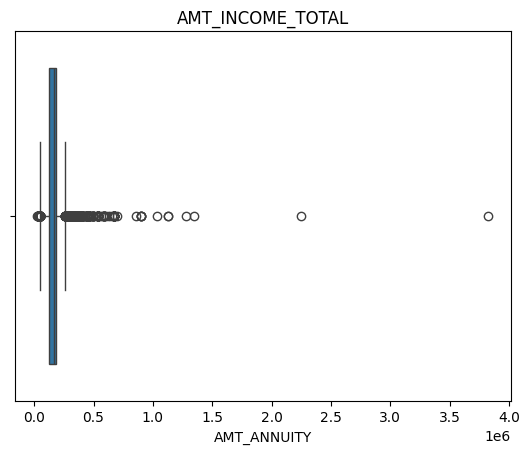

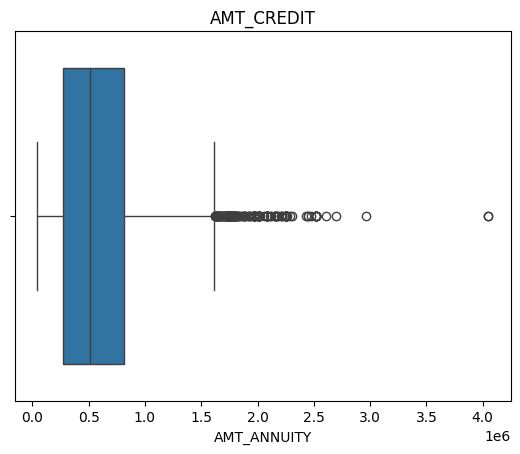

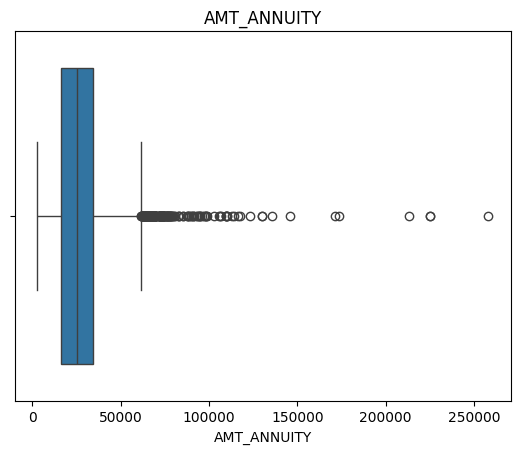

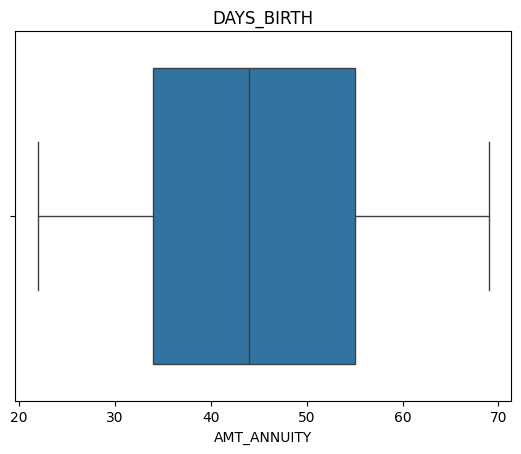

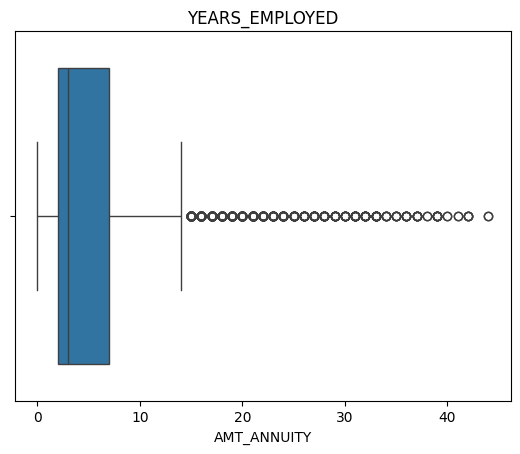

In [134]:
def boxPlot(column):
  sns.boxplot(x=df[column], orient='h')

  plt.title(column)
  plt.xlabel('AMT_ANNUITY')
  plt.show()

data = df.select_dtypes(include = 'number').columns
for col in data:
  boxPlot(col)

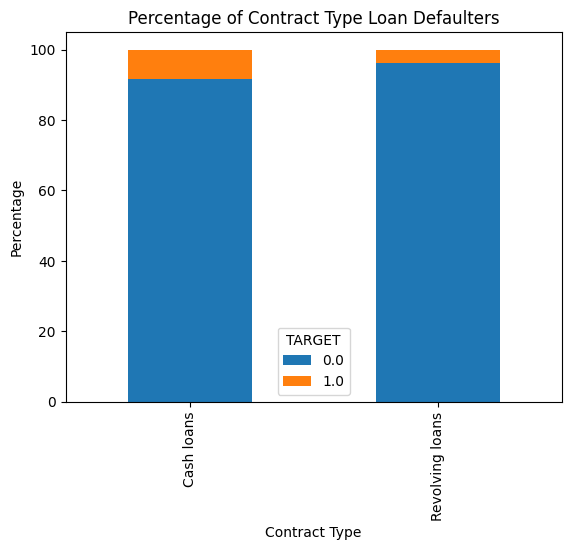

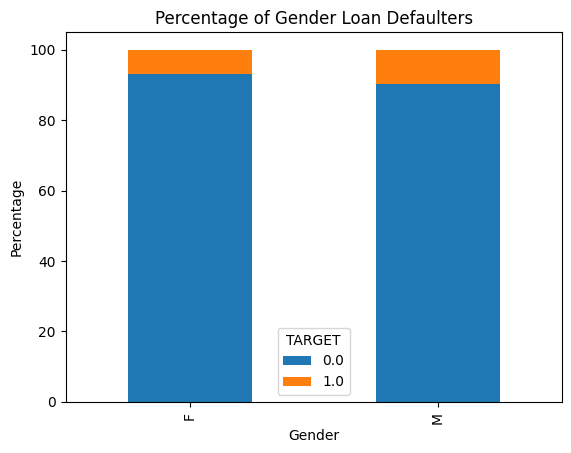

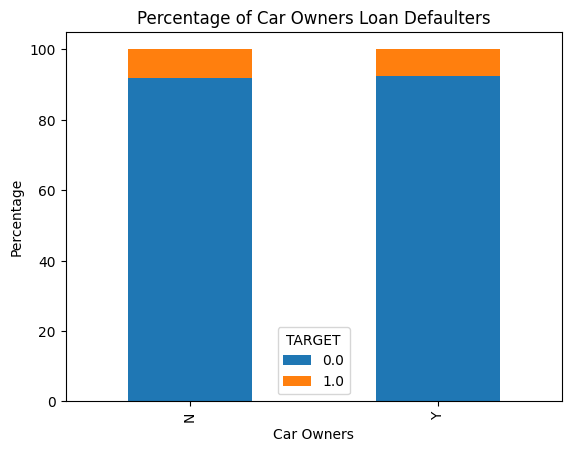

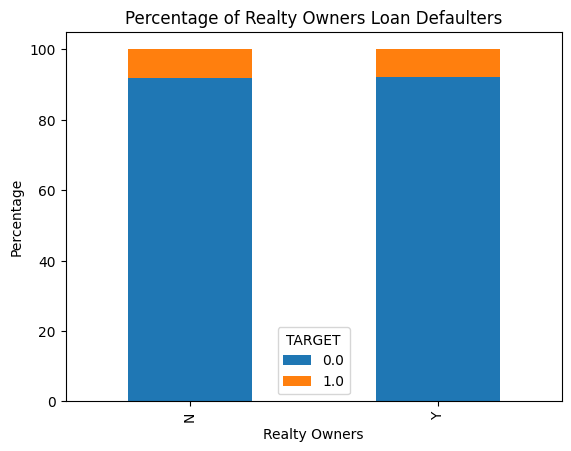

In [135]:
def stackplot(column, title):
  counts = df.groupby([column, 'TARGET']).size().unstack(fill_value=0)
  percentages = counts.div(counts.sum(axis=1), axis=0) * 100

  percentages.plot(kind='bar', stacked=True)
  plt.title(f'Percentage of {title} Loan Defaulters')
  plt.ylabel('Percentage')
  plt.xlabel(title)
  plt.show()

data = df.select_dtypes(include='object').columns
title = ['Contract Type', 'Gender', 'Car Owners', 'Realty Owners' ]
for col in data:
  stackplot(column = col, title = title[0])
  title.pop(0)

In [136]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,YEARS_EMPLOYED
count,10231.000000,10231.000000,1.023100e+04,1.023100e+04,10231.000000,10231.000000,10231.000000
mean,0.078682,0.402502,1.678989e+05,6.002573e+05,27195.623546,44.493989,5.509823
std,0.269256,0.693955,8.679783e+04,4.010417e+05,14930.480039,11.999794,5.911574
min,0.000000,0.000000,2.700000e+04,4.500000e+04,2974.500000,22.000000,0.000000
25%,0.000000,0.000000,1.271250e+05,2.700000e+05,16515.000000,34.000000,2.000000
50%,0.000000,0.000000,1.678989e+05,5.124465e+05,25128.000000,44.000000,3.000000
75%,0.000000,1.000000,1.800000e+05,8.100000e+05,34596.000000,55.000000,7.000000
max,1.000000,3.000000,3.825000e+06,4.050000e+06,258025.500000,69.000000,44.000000


The categorical dataset indicates that;

*   The dataset contains more Male defaulters
*   Although not a significant difference, applicants who don't own a car default more than applicants who do
*   Also not a significant difference but applicants who don't own real estate default more than applicants who do
*   Applicants who get Cash loans are more liable to default than applicants who get Revolving loans







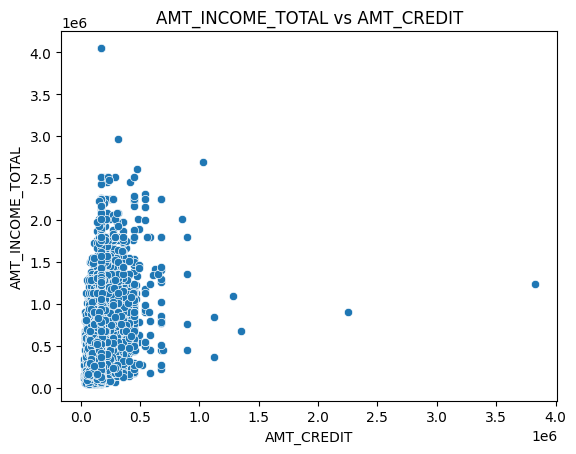

In [137]:
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=df)
plt.title('AMT_INCOME_TOTAL vs AMT_CREDIT')
plt.ylabel('AMT_INCOME_TOTAL')
plt.xlabel('AMT_CREDIT')
plt.show()

Regardless of income, majority applicants got loan below 1,500,000

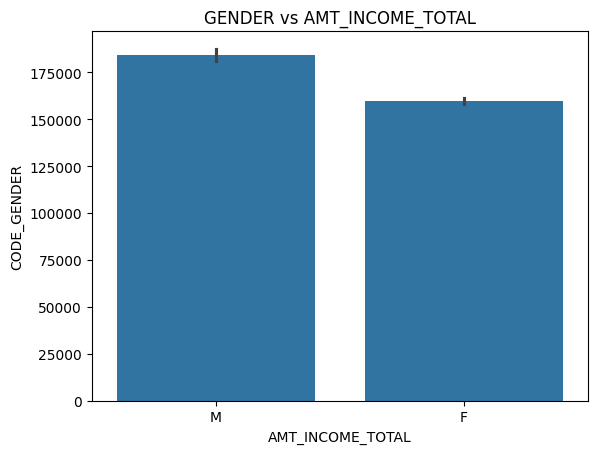

In [138]:
sns.barplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', data=df)
plt.title('GENDER vs AMT_INCOME_TOTAL')
plt.ylabel('CODE_GENDER')
plt.xlabel('AMT_INCOME_TOTAL')
plt.show()

Males get more loan than females

<Axes: >

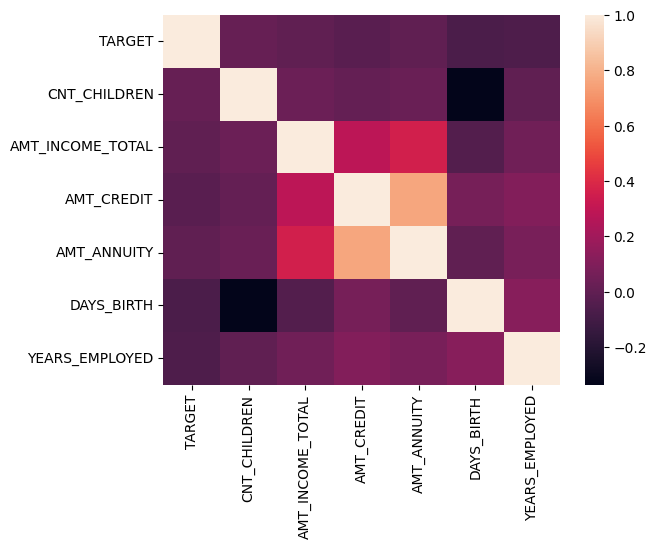

In [139]:
correlation = df.select_dtypes(include='number').corr()
sns.heatmap(correlation)

In [140]:
# Check correlation between features and the target
correlation = df.select_dtypes(include='number').corr()
print(correlation['TARGET'].sort_values(ascending=False))

TARGET              1.000000
CNT_CHILDREN        0.016210
AMT_ANNUITY        -0.001997
AMT_INCOME_TOTAL   -0.004991
AMT_CREDIT         -0.024734
YEARS_EMPLOYED     -0.061130
DAYS_BIRTH         -0.070754
Name: TARGET, dtype: float64


In [141]:
df.drop(columns='AMT_ANNUITY', inplace=True)

**MODEL**

In [142]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [143]:
y = df['TARGET']
X = df.drop(columns = 'TARGET')
print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')

X.shape: (10231, 9)
y.shape: (10231,)


In [144]:
Category = df.select_dtypes(include='object').columns

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[Category])

encoded_X = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(Category), index=df.index)

X = pd.concat([df, encoded_X], axis=1).drop(Category, axis=1)


In [145]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(10231, 14)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (8184, 14)
X_test: (2047, 14)
y_train: (8184,)
y_test: (2047,)


In [147]:
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [148]:
clf = LogisticRegression()

clf.fit(X_train_resampled, y_train_resampled)

y_pred = clf.predict(X_test)


In [149]:
scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=5)


print(f'Cross-Validation Scores: {scores}')

print(f'Average Cross-Validation Score: {scores.mean():.2f}')

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Average Cross-Validation Score: 1.00


In [150]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


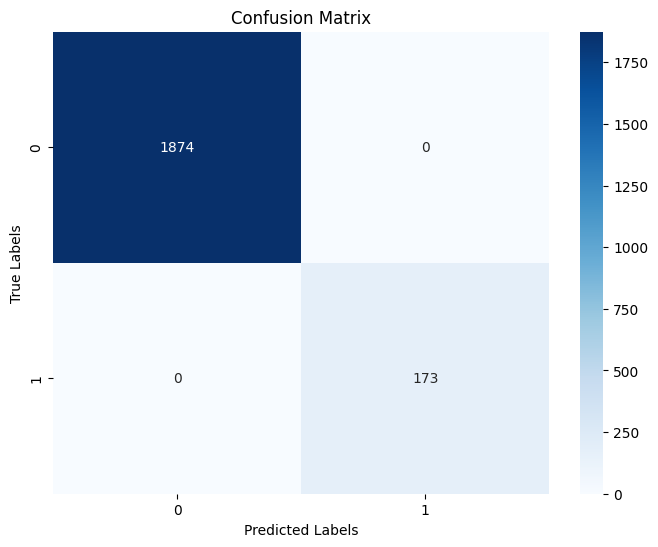

In [151]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()